In [7]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
#The issue you're encountering is due to the fact that the sklearn package is deprecated. 
#Instead of pip install sklearn, you need to install scikit-learn directly. 
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates f

In [6]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.2/11.0 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.0 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.0 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.0 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/11.0 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/11.0 MB 2.5 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.0 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.0 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.0 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.0 MB 2.6 MB/s eta 0:00:04
   ----- ----


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
The error you're encountering, UnicodeDecodeError, typically occurs when the CSV file contains characters that aren't properly decoded using the default encoding (utf-8).

In [26]:
df=pd.read_csv('spam.csv', encoding='latin1') # #Latin-1 is occasionally, though imprecisely, referred to as Extended ASCII. This is because the first 128 characters of its set are identical to the US ASCII standard. 
                                                #The remainder of the set contains accented characters and symbols.
#Get shape and head
print(df.shape)
df.head(10)

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


df.drop() is the method used to drop rows or columns.
["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"] is the list of column names you want to drop.
<br>axis=1 specifies that you are dropping columns. (Use axis=0 to drop rows.)

In [199]:
# Drop the extra columns and rename columns

df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,NaN,NaN,NaN


 1. there are several other ways to drop extra columns in a pandas DataFrame. Here are some alternatives:
 2. While df.drop() is the most common method for dropping columns, the other methods like using del, pop, column indexing, or filter offer more flexibility depending on your use case.


In [200]:
# 2.  Using drop with columns parameter Instead of using labels and axis, you can directly specify the columns to drop using the columns parameter, which is more   explicit.
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [ ]:
#2. Using del keyword
#You can also delete columns using the del keyword in Python. However, this only works for single columns at a time:
del df["Unnamed: 2"]
del df["Unnamed: 3"]
del df["Unnamed: 4"]


In [ ]:
#3. Using pop method
#The pop method can be used to drop a single column and return it. Like del, it works on one column at a time.
df.pop("Unnamed: 2")
df.pop("Unnamed: 3")
df.pop("Unnamed: 4")


In [201]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [204]:
#4. Using column indexing to keep only desired columns
#You can select the columns you want to keep by passing a list of column names to df[]:
df[["v1", "v2"]]  # Replace with the columns you want to keep


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [205]:
#5. Using filter method
#You can use the filter method to select the columns you want to keep and drop others:
df.filter(items=["v1", "v2"])  # Columns to keep


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [206]:
#6. Using .loc with slicing
#You can also use .loc[] to select columns, specifying a slice of the columns you want to retain:
df.loc[:, ["v1", "v2"]]


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


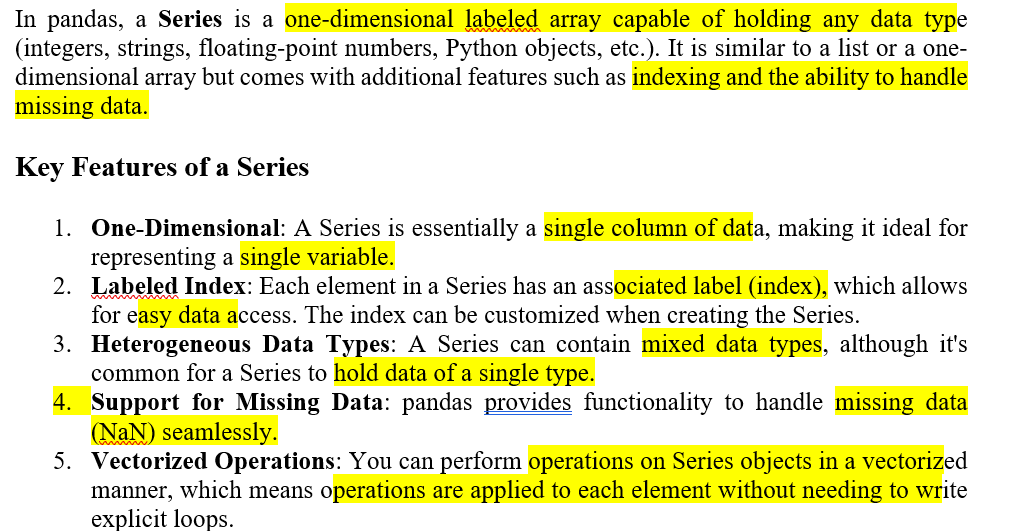
1.  Data Analysis: Series is often used in data analysis and manipulation tasks, such as filtering and aggregating data.
2.  Statistical Calculations: You can perform statistical operations like mean, median, and standard deviation directly on a Series.
In summary, a Series is a fundamental building block in pandas, used to represent and manipulate one-dimensional data effectively.

In [291]:
#Creating a Series
#You can create a Series in several ways. Here are a few examples:

#From a list:
import pandas as pd

data = [10, 20, 30, 40]
series = pd.Series(data)
print(series)


0    10
1    20
2    30
3    40
dtype: int64


In [292]:
#From a dictionary:
data = {'a': 10, 'b': 20, 'c': 30}
series = pd.Series(data)
print(series)


a    10
b    20
c    30
dtype: int64


In [293]:
#With a custom index:
data = [1, 2, 3]
index = ['first', 'second', 'third']
series = pd.Series(data, index=index)
print(series)


first     1
second    2
third     3
dtype: int64


In [294]:
#creating and accessing a Series:
import pandas as pd

# Creating a Series
data = [5, 10, 15, 20]
index = ['A', 'B', 'C', 'D']
series = pd.Series(data, index=index)

# Displaying the Series
print(series)

# Accessing elements
print(series['B'])  # Output: 10
print(series[2])    # Output: 15


A     5
B    10
C    15
D    20
dtype: int64
10
15


C:\Users\Dr. Atif Khan\AppData\Local\Temp\ipykernel_5640\1885696848.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(series[2])    # Output: 15


In [40]:
default_value = pd.get_option('display.max_colwidth')  # Check current default value
print(default_value)  # Typically, it's 50


300


1. <b>pd.set_option('display.max_columns', None)</b>
2. This command sets a display option in Pandas to show all columns of the DataFrame when output is printed.
3. Purpose: By default, Pandas may truncate or limit the number of displayed columns, but this ensures that all columns will be shown, regardless of how many there are.
4. <b>pd.set_option('display.expand_frame_repr', False)</b>
5. What it does: This option controls how Pandas prints large DataFrames. Setting it to False prevents DataFrames from being displayed in a split or wrapped format (across multiple lines).
6. Purpose: Ensures that even wide DataFrames are displayed in one continuous line rather than split across multiple lines.
   This is useful if you prefer to see the entire row on a single line, especially for wide tables.
7. When you display a wide DataFrame in Pandas, by default, Pandas tries to make the DataFrame "fit" the screen. If there are
  too many columns to fit horizontally, Pandas may "wrap" or "split" the DataFrame across multiple lines to show all the
   columns. This is called expanded representation.
8. <b>pd.set_option('max_colwidth', 100)</b>  # Set maximum column width to 100 characters
9. This would allow each column's content to display up to 100 characters before being truncated. If you want to revert it to the default behavior or remove the limit entirely, you can use None:
   

In [41]:
df = df.rename(columns={'v1': 'category', 'v2': 'text'})
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False) #True (default): Splits/wraps the DataFrame across multiple lines if it's too wide.
                                                    #False: Displays the DataFrame in one continuous line, regardless of width.
pd.set_option('max_colwidth',None)  #Setting max_colwidth to None removes this limit. This means Pandas will display the full content of each cell, regardless of how long the text is.
df.head(20)

#df.rename(columns={'v1': 'category', 'v2': 'text'}, inplace=True) This will rename the columns directly in the existing DataFrame.


,category,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [24]:
df.columns = ["category", "text"]

In [25]:
df

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [96]:
text="The quick brown fox jumps over 2 lazy dogs!"

In [97]:
text = text.lower() # Converts the text to lowercase.
text


'the quick brown fox jumps over 2 lazy dogs!'

In [79]:
#text = [word for word in text.split(" ")] #Splits the sentence into words (tokens) by spaces.
#text    # comment it after use, it may cause error

['the', 'quick', 'brown', 'fox', 'jumps', 'over', '2', 'lazy', 'dogs!']

In [98]:
import string

In [99]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [100]:
text = [word.strip(string.punctuation) for word in text.split(" ")] #Strips punctuation from each word.
text

['the', 'quick', 'brown', 'fox', 'jumps', 'over', '2', 'lazy', 'dogs']

In [57]:
#The strip() method in Python is used to remove leading and trailing characters from a string. 
#By default, it removes whitespace, but you can also specify other characters to strip.
# Example 1: Strip whitespace
#Whitespace Removal:
#In the first example, strip() removes the spaces at the beginning and end of the string.

text = "   Hello, World!   "
cleaned_text = text.strip()
print(cleaned_text)  # Output: "Hello, World!"

# Example 2: Strip specific characters, strip("#") removes only the # symbols from both ends of the string, 
#but not the exclamation marks inside the text.

text = "###Hello, World!!!###"
cleaned_text = text.strip("#")
print(cleaned_text)  # Output: "Hello, World!!!"


Hello, World!
Hello, World!!!


In [58]:
#You can also use lstrip() to remove characters from the left (start) 
#or rstrip() to remove them from the right (end) of the string:
# Example 3: Strip characters only from the left
text = "###Hello, World!!!###"
cleaned_text = text.lstrip("#")
print(cleaned_text)  # Output: "Hello, World!!!###"

# Example 4: Strip characters only from the right
text = "###Hello, World!!!###"
cleaned_text = text.rstrip("#")
print(cleaned_text)  # Output: "###Hello, World!!!"


Hello, World!!!###
###Hello, World!!!


In [196]:
text = "###Hello, World!!!###."
cleaned_text = text.strip("#!.")
cleaned_text

'Hello, World'

In [197]:
text = "###Hello, World!!!###"
cleaned_text = text.strip("#!")
cleaned_text

'Hello, World'

In [65]:
# Original text string
text = "I have 2r apples and 3 bananas."

# Tokenize the text into words (for simplicity, we'll just split by space)
words = text.split()
print(words)

for w in words:
    for c in w:
        print(c)


['I', 'have', '2r', 'apples', 'and', '3', 'bananas.']
I
h
a
v
e
2
r
a
p
p
l
e
s
a
n
d
3
b
a
n
a
n
a
s
.


In [69]:
#The isdigit() method in Python is used to check if all characters in a string are digits. 
#It returns True if the string consists solely of digits and False otherwise.
#The isdigit() method is useful for validating that a string consists only of numeric characters. 
#It's commonly used in scenarios where you want to ensure that input data is purely numerical 
#before performing operations like conversions or calculations.

# Example 1: Only digits
num_str = "123456"
print(num_str.isdigit())  # Output: True

# Example 2: Digits with spaces
num_str_with_space = "123 456"
print(num_str_with_space.isdigit())  # Output: False

# Example 3: Digits with letters
mixed_str = "123abc"
print(mixed_str.isdigit())  # Output: False

# Example 4: Decimal numbers
decimal_str = "123.45"
print(decimal_str.isdigit())  # Output: False

# Example 5: An empty string returns False since there are no characters to check.
empty_str = ""
print(empty_str.isdigit())  # Output: False

# Example 6: Negative numbers (with sign)
negative_str = "-123"
print(negative_str.isdigit())  # Output: False

# Example 7: Unicode digits
unicode_digit_str = "٢٣٤"  # Arabic-Indic digits for 234
print(unicode_digit_str.isdigit())  # Output: True


True
False
False
False
False
False
True


In [70]:
#The any() function in Python is used to check if any element in an iterable (like a list, tuple, or string) is True. 
#If at least one element is True, any() returns True; otherwise, it returns False.

# Example 1: List with at least one True value
list_with_true = [False, False, True, False]
print(any(list_with_true))  # Output: True

# Example 2: All False values
all_false = [False, False, False]
print(any(all_false))  # Output: False

# Example 3: Empty list
empty_list = []
print(any(empty_list))  # Output: False

# Example 4: Checking a string
string_check = "hello"
print(any(char.isdigit() for char in string_check))  # Output: False

# Example 5: Checking for digits in a string
mixed_string = "abc123"
print(any(char.isdigit() for char in mixed_string))  # Output: True

# Example 6: List of numbers
numbers = [0, 0, 5, 0]
print(any(numbers))  # Output: True (5 is a non-zero number)

# Example 7: List of empty strings
empty_strings = ["", "", "Hello", ""]
print(any(empty_strings))  # Output: True (because "Hello" is a non-empty string)


True
False
False
False
True
True
True


In [72]:
mixed_string = "abc123"
lst=[any(char.isdigit() for char in mixed_string)]  # Output: True
lst

[True]

In [73]:
for c in "abc123":
    print(c)

a
b
c
1
2
3


In [ ]:
# Remove words that contain numbers
cleaned_words = [word for word in words if not any(c.isdigit() for c in word)]

# Print the result
print(cleaned_words)  # Output: ['I', 'have', 'apples', 'and', 'bananas.']

1. You can remove HTML tags from text in Python using the BeautifulSoup library or regular expressions. Both methods will effectively remove HTML tags from the text.
2. The BeautifulSoup method is generally preferred for more complex HTML content, while regular expressions provide a quick and simple solution for straightforward cases.Below are examples of both methods.

3. Method 1: Using BeautifulSoup
First, you'll need to install the beautifulsoup4 library if you haven't already:

In [ ]:
!pip install beautifulsoup4 # already installed here

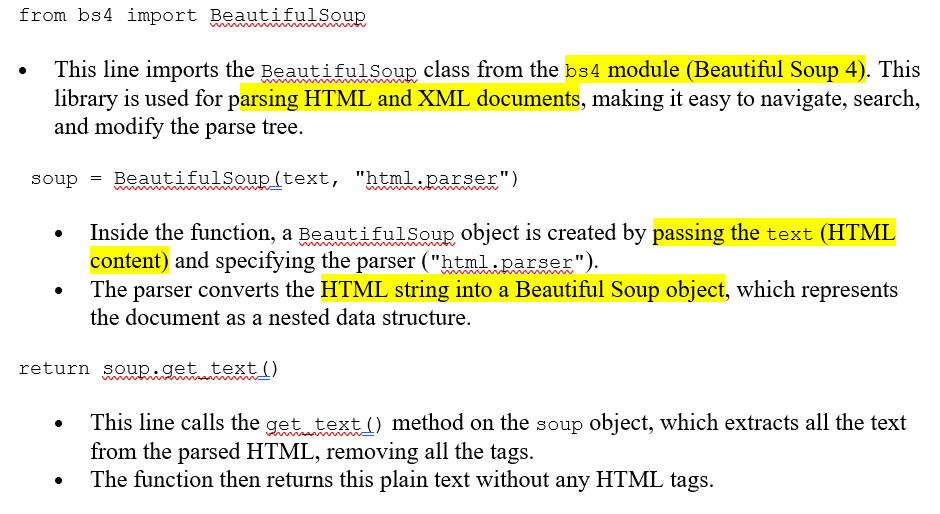

In [272]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    # Create a BeautifulSoup object and get the text
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Example usage
html_text = "<p>This is <strong>bold</strong> text with <a href='#'>a link</a>.</p>"
cleaned_text = remove_html_tags(html_text)
print(cleaned_text)  # Output: This is bold text with a link.


This is bold text with a link.


Method 2: Using Regular Expressions
You can also use the re module for a quick solution

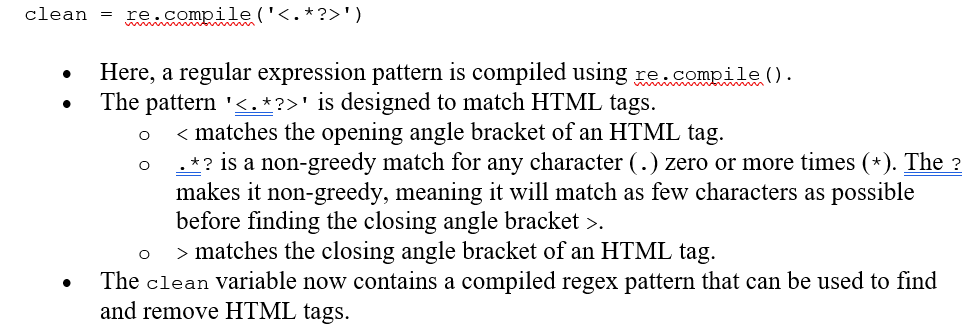
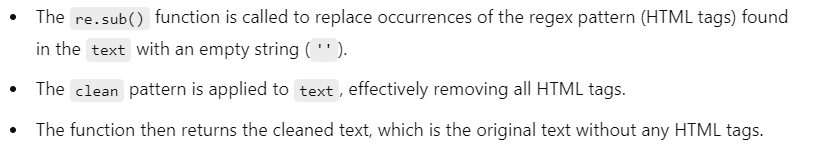

In [273]:
import re

def remove_html_tags(text):
    # Use regular expression to remove HTML tags
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Example usage
html_text = "<p>This is <strong>bold</strong> text with <a href='#'>a link</a>.</p>"
cleaned_text = remove_html_tags(html_text)
print(cleaned_text)  # Output: This is bold text with a link.


This is bold text with a link.


1. Greedy Pattern (<.*>)
2. If you use the pattern '<.*>', it will greedily match everything between the first < and the last >, like this:

In [275]:
#html_string = "<p>This is <strong>bold</strong> text with <a href='#'>a link</a>.</p>"

import re
html_string = "<p>This is <strong>bold</strong> text with <a href='#'>a link</a></p>."
greedy_match = re.findall(r'<.*>', html_string) #The r in r'<.*>' tells Python to treat the string as a raw string, so it doesn’t treat backslashes as escape characters.
print(greedy_match)

#The pattern matches everything from the first <p> to the last </p>, because .* is greedy and tries to consume as much text as possible.


["<p>This is <strong>bold</strong></p> text with <a href='#'>a link</a>"]


2. Non-Greedy Pattern (<.*?>)
3.  When you use the pattern '<.*?>', the ? after .* makes it non-greedy, so it stops at the first > it finds after a <, like this:
4. Summary of the ? in '<.*?>':
5. .*: Match any characters, zero or more times (greedy by default).
6. ?: Makes the preceding .* match in a non-greedy (lazy) way, stopping at the first opportunity (first >).
7. Without the ?, the regex would match everything between the first < and the last >. Adding the ? ensures it matches only one tag at a time.

In [277]:
import re
html_string = "<p>This is <strong>bold</strong> text with <a href='#'>a link</a>.</p>"
non_greedy_match = re.findall(r'<.*?>', html_string)
print(non_greedy_match)

#Now the non-greedy .*? matches just enough characters to reach the first closing >, matching individual HTML tags one by one.


['<p>', '<strong>', '</strong>', "<a href='#'>", '</a>', '</p>']


In [101]:
#Remove words that contain numbers
# if any character in a word is a digit, then isdigits returns true and not true becomes false, so that world would be exluded
text = [word for word in text if not any(c.isdigit() for c in word)] 


['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'lazy', 'dogs']

In [278]:
#In the provided code, the step that could be done using a regular expression is:
# Initialize some sample data
text = "This is a test text with numbers 123 and words like word2 and number3."

# Tokenize the text (split it into words)
text = text.split()

# Print the tokenized text
print("Before removing numbers:", text)

# Remove words that contain numbers
text = [word for word in text if not any(c.isdigit() for c in word)]

# Print the result
print("After removing words with numbers:", text)


Before removing numbers: ['This', 'is', 'a', 'test', 'text', 'with', 'numbers', '123', 'and', 'words', 'like', 'word2', 'and', 'number3.']
After removing words with numbers: ['This', 'is', 'a', 'test', 'text', 'with', 'numbers', 'and', 'words', 'like', 'and']


1. In Python regular expressions, r'\d' is a pattern used to match any digit character (i.e., any number from 0 to 9).
2. \d: This is a metacharacter in regular expressions that stands for any digit character. 
3. It is shorthand for [0-9], meaning it will match any single digit from 0 to 9.

4. r'': The r before the string makes it a raw string in Python. This ensures that backslashes (\) are treated as literal characters and not as escape characters. 
Without r, Python would try to interpret \ as an escape sequence, potentially causing errors.

In [281]:
#The above line of code could be replaced with a regular expression to match and remove words that contain any digits. For example, using regular expressions:
text = "This is a test text with numbers 123 and words like word2 and number3."
text = text.split()
import re

#the regular expression r'\d' matches any digit, and re.search() is used to find if a word contains any digit. 
#The word is excluded if it contains a digit.

text = [word for word in text if not re.search(r'\d', word)]
print(text)


['This', 'is', 'a', 'test', 'text', 'with', 'numbers', 'and', 'words', 'like', 'and']


In [ ]:
import re

# Sample string
text = "My phone number is 12345."

# Find all digits using the regular expression \d
digits = re.findall(r'\d', text)  #his searches the string text for all occurrences of digits (\d) and returns them as a list of strings.

print(digits)  # Output: ['1', '2', '3', '4', '5']


In [288]:
#r'_': This pattern matches underscores in the string.
#re.sub(r'_', '', text): This function replaces all underscores ('_') in text with an empty string (''), effectively removing them.

import re

# Sample string
text = "My phone number_ is 12345."

# Remove underscores using re.sub
cleaned_text = re.sub(r'_', '', text)

print(cleaned_text)  # Output: My phone number is 12345.


My phone number is 12345.


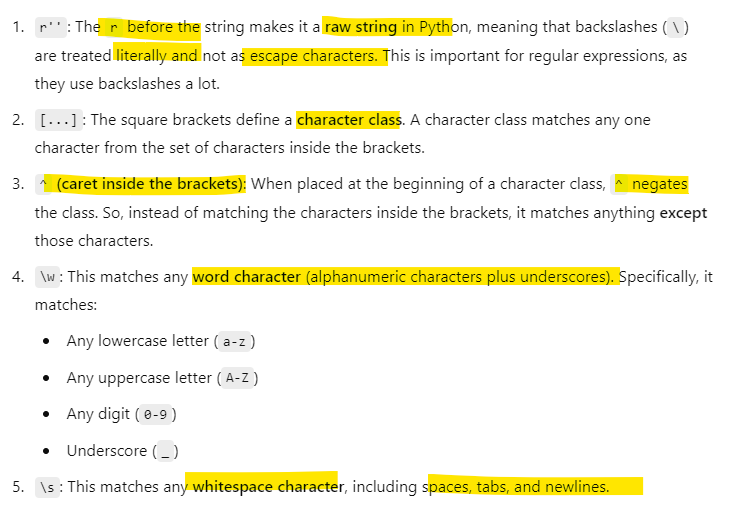

In [283]:
import re

# Sample string with various characters
text = "Hello, World!; 123\t"

# Use regular expression to find characters that are NOT word characters or whitespace
non_word_or_space = re.findall(r'[^\w\s]', text)

print(non_word_or_space)  # Output: [',', '!']


[',', '!', ';']


In [282]:
import re

def clean_text_with_regex(text):
    # lower text
    text = text.lower()
    # use regex to tokenize, remove punctuation, and strip whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation or This pattern is often used to remove punctuation or non-alphanumeric characters from text.
    text = re.sub(r'\s+', ' ', text)  # Tokenize (normalize multiple spaces to a single space)
    text = text.strip()  # Strip leading and trailing whitespace
    
    return text.split()  # Tokenize by splitting on spaces

# Example usage
example_text = "Hello, World! This is an   example sentence, with extra spaces."
cleaned_text = clean_text_with_regex(example_text)
print(cleaned_text)


['hello', 'world', 'this', 'is', 'an', 'example', 'sentence', 'with', 'extra', 'spaces']


1. ^ asserts the start of the string.
2. \d{5} matches exactly 5 digits.
3. - matches a literal hyphen.
4. \d{7} matches exactly 7 digits.
5. - matches another literal hyphen.
6. \d matches exactly 1 digit.
7. $ asserts the end of the string.

In [289]:
import re

# Define the regex pattern
pattern = r'^\d{5}-\d{7}-\d$'

# Function to validate the identity
#Checks if the identity matches the pattern.
Returns True if valid; False otherwise.
def validate_identity(identity):
    if re.match(pattern, identity):
        return True
    else:
        return False


identities = [
    "17301-9199423-3",  # Valid
    "12345-6789012-9",  # Valid
    "1234-5678901-1",   # Invalid (first part has 4 digits)
    "12345-67890-1",    # Invalid (second part has 5 digits)
    "12345-6789012-12", # Invalid (third part has 2 digits)
]

# Validate each identity
for id in identities:
    result = validate_identity(id)
    print(f"{id}: {'Valid' if result else 'Invalid'}")


17301-9199423-3: Valid
12345-6789012-9: Valid
1234-5678901-1: Invalid
12345-67890-1: Invalid
12345-6789012-12: Invalid


1. To validate identifiers in Python, we need to follow specific rules. In Python, an identifier must:

2. Begin with a letter (a-z, A-Z) or an underscore (_).
3. Followed by letters, digits (0-9), or underscores.
4. No spaces or special characters are allowed.
5. Cannot be a reserved keyword.

6. Regex Pattern for Identifier Validation
A suitable regex pattern for a Python identifier would be:

^[a-zA-Z_][a-zA-Z0-9_]*$

In [290]:
import re

# Define the regex pattern for valid identifiers
pattern = r'^[a-zA-Z_][a-zA-Z0-9_]*$'

# List of reserved keywords in Python
keywords = {
    'False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await',
    'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except',
    'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda',
    'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 
    'with', 'yield'
}

# Function to validate identifiers
def validate_identifier(identifier):
    if re.match(pattern, identifier) and identifier not in keywords:
        return True
    else:
        return False


identifiers = [
    "my_variable",    # Valid
    "myVar123",       # Valid
    "3rdVar",         # Invalid (starts with a digit)
    "_privateVar",    # Valid (starts with an underscore)
    "def",            # Invalid (reserved keyword)
    "variable-name",   # Invalid (contains a hyphen)
    "variable name",  # Invalid (contains a space)
    "myFunction$",    # Invalid (contains a special character)
]

# Validate each identifier
for id in identifiers:
    result = validate_identifier(id)
    print(f"{id}: {'Valid' if result else 'Invalid'}")


my_variable: Valid
myVar123: Valid
3rdVar: Invalid
_privateVar: Valid
def: Invalid
variable-name: Invalid
variable name: Invalid
myFunction$: Invalid


In [103]:
#Remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
text = [x for x in text if x not in stop]
text

ModuleNotFoundError: No module named 'nltk'

In [105]:
!pip install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ---------------------------- --------- 30.7/41.5 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 287.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 960.0 kB/s eta 0:00:01
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 4.1 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.5 MB 3.6 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 3.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.5 MB 3.5 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 3.1 MB/s eta 0:00:01
   -----------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Dr. Atif
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

1. NLTK, or the Natural Language Toolkit, is a comprehensive library in Python designed for working with human language data (text). It provides tools and resources for tasks related to natural language processing (NLP), which include but are not limited to tokenization, parsing, classification, stemming, tagging, and semantic reasoning. Here’s a breakdown of some key features and components of NLTK:

Key Features of NLTK

2. Text Processing Libraries:

    Tokenization: Splitting text into words or sentences.
    Stopwords: A list of common words (like "and", "the", etc.) that are often filtered out in text processing.
3. Linguistic Data:

    Corpora: NLTK includes various corpora and lexical resources, such as WordNet, which provides synonyms and antonyms.
4. Part-of-Speech Tagging:

    Identifying the grammatical parts of speech (nouns, verbs, adjectives, etc.) in a sentence.
5. Stemming and Lemmatization:

    Stemming: Reducing words to their root form (e.g., "running" to "run").
    Lemmatization: Similar to stemming, but it considers the morphological analysis of words (e.g., "better" to "good").
6. Classification and Machine Learning:

    NLTK provides tools for building and evaluating classifiers for various NLP tasks.
7. Text Mining:

    Techniques for extracting information from text data, such as named entity recognition.
8. Visualization:

    Tools for visualizing text data and NLP processes.

In [115]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)
text = [x for x in text if x not in stop]
text

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

['quick', 'brown', 'fox', 'jumps', 'lazy', 'dogs']

In [117]:
stop.append('hello')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [129]:
#The word_tokenize function requires the Punkt tokenizer models to function correctly.
#Download Required NLTK Data: You need to download the Punkt tokenizer models. You can do this by running the following command:
import nltk
#nltk.download('punkt') used for word tokenization
nltk.download('punkt_tab')   # In case the previous download does not resolve the issue


[nltk_data] Downloading package punkt_tab to C:\Users\Dr. Atif
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [130]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = set(stopwords.words('english'))

In [131]:
# Load the default English stopwords and convert to a set

#Convert to Set: The line stop = set(stopwords.words('english')) converts the list of stopwords into a set. 
#This allows you to use set methods like update().

#Using update(): After converting stop to a set, you can use stop.update(custom_stopwords) to add your custom stopwords to the existing stopwords.


# Print original stopwords
print("Original Stopwords:", stop)
print("\n******************************************************************")
print("\n******************************************************************")

# Define custom stopwords
custom_stopwords = ['hello', 'world']

# Add custom stopwords to the original set
stop.update(custom_stopwords)

# Print updated stopwords
print("Updated Stopwords:", stop)
print("\n******************************************************************")

# Example of removing stopwords from a sample text


text = "Hello, how is the world treating you today?"
tokens = word_tokenize(text)
print(tokens)

# Remove stop words
filtered_tokens = [word for word in tokens if word.lower() not in stop]
print("Filtered Tokens:", filtered_tokens)

Original Stopwords: {"haven't", 'couldn', 'in', 'some', 'who', 'are', 'we', "you'd", 'he', 'this', 'been', 'don', 'y', 'wasn', "weren't", 'wouldn', 'most', 'weren', 'an', 'not', "isn't", 'which', 'same', 'both', 'other', 'herself', 'during', 'to', "mustn't", 'your', 'about', 'but', 'against', 'have', 've', 'for', 'from', 'few', 'than', 'only', "wouldn't", 'if', 'with', 'isn', 'is', 'hadn', "needn't", 'after', "you'll", "mightn't", 'under', 'again', 'haven', 'once', "won't", "you've", 'd', "couldn't", 'how', 'between', 'you', 'being', 'into', 'm', 'there', 'ain', 'at', 'shouldn', "that'll", 'ma', 'itself', 'she', 'themselves', 'then', 'won', 'myself', 'our', 'do', 'why', 'such', 'those', "aren't", "hadn't", 'had', 'when', 'above', 'further', 's', 'yourself', 'or', "didn't", 'of', 'what', 'because', 'own', 'ourselves', 'nor', 'these', 'just', 'should', "you're", 'o', "she's", 'any', 'out', 't', 'her', 'and', 'mustn', "shouldn't", 'did', 'yourselves', 'theirs', 'him', 'i', 'having', 'it',

List Comprehension: This is a concise way to create a new list by iterating over an existing list. The syntax is:
new_list = [expression for item in iterable if condition]
text = [t for t in text if len(t) > 0] is a list comprehension used to filter out empty tokens from a list of tokens in Python. An "empty token" refers to any string that has a length of zero, meaning it is either an empty string "" 
or a result of stripping whitespace or punctuation that left no characters behind.

In [133]:
#In this example:

#There are empty tokens represented by "" (the empty strings).
#There are also tokens that consist of just a space " " which, when stripped, would become an empty token.

# Initial list of tokens
text = ["Hello", "", "world", "!", " ", "Python", "", "is", "great", ""]

# Remove empty tokens
text = [t for t in text if len(t) > 0]

# Output the cleaned text
print(text)


['Hello', 'world', '!', ' ', 'Python', 'is', 'great']


In [ ]:
To ensure that you remove not just empty strings but also strings that consist of only whitespace, you should first strip the tokens of whitespace 
before checking their length.

In [134]:
# Initial list of tokens
text = ["Hello", "", "world", "!", " ", "Python", "", "is", "great", ""]

# Remove empty tokens and whitespace-only tokens
text = [t for t in text if len(t.strip()) > 0]

# Output the cleaned text
print(text)


['Hello', 'world', '!', 'Python', 'is', 'great']


# filter out very short sentences
1. Example: Filtering Short Sentences
2 Let’s say you have a list of sentences, and you want to filter out those that are shorter than a specified length, such as 3 words.

Reasons for Filtering Very Short Sentences
Lack of Context: Very short sentences (especially those with fewer than 3 words) often lack the context needed to convey meaningful information. They may not provide enough data for classification algorithms to learn from.

Noise Reduction: Short sentences can introduce noise into the dataset. For example, sentences like "Yes." or "Go." do not carry much meaning in a classification task. Removing them helps improve the quality of the training data.

Improved Model Performance: Many classification models benefit from having more substantial and informative data points. Filtering out very short sentences helps to ensure that the model is trained on sentences that contain more relevant information, leading to better classification performance.

Consistency: Short sentences can create inconsistencies in the dataset. By filtering them out, you maintain a level of uniformity in sentence length, which can improve the robustness of the model.

Resource Efficiency: Training models on shorter sentences can lead to increased computational overhead without providing additional value. Filtering them can save resources during the training process.

In [192]:
sentences = [
    "I am happy.",
    "It is.",
    "Python is great!",
    "Yes.",
    "Text classification is important.",
    "Go.",
    " ",
    "Hello, world."
]


1. The list comprehension iterates over each sentence in sentences.
2. For each sentence, s.split() breaks the sentence into words, and len(s.split()) calculates the number of words.
3. The condition len(s.split()) >= min_length checks if the number of words is greater than or equal to 3.


In [193]:
# how you can filter out sentences that contain fewer than 3 words:
# Define a minimum length
min_length = 3

# Filter sentences based on word count
filtered_sentences = [s for s in sentences if len(s.split()) >= min_length]

# Print the filtered sentences
print(filtered_sentences)


['I am happy.', 'Python is great!', 'Text classification is important.']


In [136]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Downloading necessary data
#nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')

# Example text
text = "Python is a great programming language."

# Tokenize the text (break into words)
tokens = word_tokenize(text)
print(tokens)



[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Dr. Atif Khan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to C:\Users\Dr. Atif
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Python', 'is', 'a', 'great', 'programming', 'language', '.']
[('Python', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('programming', 'NN'), ('language', 'NN'), ('.', '.')]


In [137]:
# Apply POS tagging
pos_tags = pos_tag(tokens)

# Output the result
print(pos_tags)

[('Python', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('programming', 'NN'), ('language', 'NN'), ('.', '.')]


In [ ]:
To remove specific tokens from a list, such as the period ('.'), you can use a list comprehension that filters out unwanted tokens.

In [138]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary resources
nltk.download('punkt')

# Example text
text = "Python is a great programming language."

# Tokenize the text
tokens = word_tokenize(text)

# Remove the period (.) from the tokens
tokens_cleaned = [token for token in tokens if token != '.']

# Output the cleaned tokens
print(tokens_cleaned)


['Python', 'is', 'a', 'great', 'programming', 'language']


[nltk_data] Downloading package punkt to C:\Users\Dr. Atif
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1. Remove Multiple Punctuation Marks
If you want to remove multiple punctuation marks, you can use the in keyword to check if a token is in a list of unwanted punctuation:

In [139]:
import nltk
from nltk.tokenize import word_tokenize

# Example text
text = "Python is a great programming language! Isn't it fun?"

# Tokenize the text
tokens = word_tokenize(text)

# List of punctuation marks to remove
punctuation_to_remove = ['.', '!', '?', ',', ';', ':']

# Remove unwanted punctuation marks
tokens_cleaned = [token for token in tokens if token not in punctuation_to_remove]

print(tokens_cleaned)


['Python', 'is', 'a', 'great', 'programming', 'language', 'Is', "n't", 'it', 'fun']


2. Remove Specific Words
If you want to remove specific words (e.g., stop words), you can do something similar by checking if the token is in a list of specific words to remove:

In [140]:
# List of specific words to remove
words_to_remove = ['is', 'a', 'the', 'it']

# Remove specific words
tokens_cleaned = [token for token in tokens if token not in words_to_remove]

print(tokens_cleaned)


['Python', 'great', 'programming', 'language', '!', 'Is', "n't", 'fun', '?']


3. Combined Example: Removing Both Punctuation and Specific Words
You can combine both conditions in a single list comprehension:

In [141]:
# Combined list of punctuation and specific words to remove
remove_set = set(punctuation_to_remove + words_to_remove)

# Remove both punctuation and specific words
tokens_cleaned = [token for token in tokens if token not in remove_set]

print(tokens_cleaned)


['Python', 'great', 'programming', 'language', 'Is', "n't", 'fun']


#Example of Complete Lemmatization Code
1. Importing Necessary Libraries

In [142]:
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


1. nltk: The Natural Language Toolkit (NLTK) is a Python library for working with human language data (text).
2. pos_tag: This function from NLTK is used to assign parts of speech (POS) to each word in a text.
3. wordnet: A lexical database for the English language that helps in the lemmatization process by providing definitions and relationships between words.
4. WordNetLemmatizer: This class provides methods for lemmatizing words based on their parts of speech.

2. Defining the POS Mapping Function
3. get_wordnet_pos: This function takes a part of speech tag (e.g., "NN", "VB", "JJ") and converts it into a format suitable for the WordNet lemmatizer.
If the tag starts with 'J', it’s an adjective (wordnet.ADJ).
If it starts with 'V', it’s a verb (wordnet.VERB).
If it starts with 'N', it’s a noun (wordnet.NOUN).
If it starts with 'R', it’s an adverb (wordnet.ADV).
If none of these conditions are met, it defaults to treating the word as a noun.

In [157]:
nltk.download('wordnet')
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


[nltk_data] Downloading package wordnet to C:\Users\Dr. Atif
[nltk_data]     Khan\AppData\Roaming\nltk_data...


In [179]:
#This is a sample sentence we will be processing. The goal is to lemmatize the words in this sentence.
text = "The geese are flying high in the sky. He computed a tough question"


In [180]:
#4. Tokenization and POS Tagging
tokens = nltk.word_tokenize(text) #word_tokenize: This function splits the sentence into individual words (tokens).
pos_tags = pos_tag(tokens)  #This function takes the list of tokens and assigns each token a part of speech tag.
                        #[(‘The’, 'DT'), (‘geese’, 'NNS')


In [181]:
#5. Initializing the Lemmatize
lemmatizer = WordNetLemmatizer()


1. lemmatizer.lemmatize(word, get_wordnet_pos(pos)): This calls the lemmatizer for each word, passing the word and its corresponding POS.
2. For instance, if the word is "geese" (NNS), the lemmatizer will return "goose".
3. If the word is "flying" (VBG), it might return "fly" or "flying" based on context, but typically, it would return "fly" when treating it as a verb.

In [182]:
#6. Lemmatizing the Text
lemmatized_text = [] #This initializes an empty list to store the lemmatized words.
for word, pos in pos_tags: #This loop iterates over each tuple in pos_tags, where word is the token and pos is its part of speech.
    print(word,pos)
    lemmatized_word = lemmatizer.lemmatize(word, get_wordnet_pos(pos))
    
    lemmatized_text.append(lemmatized_word) #The lemmatized word is added to the lemmatized_text list.


The DT
geese NNS
are VBP
flying VBG
high JJ
in IN
the DT
sky NN
. .
He PRP
computed VBD
a DT
tough JJ
question NN


In [183]:
print("Original Text:", tokens)
print("Lemmatized Text:", lemmatized_text)


Original Text: ['The', 'geese', 'are', 'flying', 'high', 'in', 'the', 'sky', '.', 'He', 'computed', 'a', 'tough', 'question']
Lemmatized Text: ['The', 'goose', 'be', 'fly', 'high', 'in', 'the', 'sky', '.', 'He', 'compute', 'a', 'tough', 'question']


In [ ]:
https://www.datacamp.com/tutorial/stemming-lemmatization-python

1. The code effectively removes any words that are only one character long from the list. This is particularly useful in text processing tasks where single-letter words may not provide significant value and can be considered noise in the data. The final list contains only words that contribute more meaning to the text, which is often desired in natural language processing (NLP) applications.

In [186]:
text = ["I", "am", "a", "Python", "programming", "language", "!", "is"]
text = [t for t in text if len(t) > 1] #text is a list of words that includes some single-letter words (like "I" and "a"), punctuation ("!"), and longer words.
text

['am', 'Python', 'programming', 'language', 'is']

In [ ]:
#The line text = " ".join(text) is used to concatenate a list of words into a single string, with each word separated by a space. This is often done after various preprocessing steps (like tokenization, cleaning, lemmatization, etc.) to prepare the text for further analysis or modeling.

In [190]:
#Imagine you have processed a sentence and you have the following list of words:
#This list represents the individual words that make up your sentence after various preprocessing steps (like removing punctuation, filtering out short words, etc.).
text = ['python', 'is', 'a', 'great', 'programming', 'language']


In [191]:
#You can join these words back into a single sentence using the join method:
# Join the list of words into a single string
text = " ".join(text)

#The join method takes the list text and concatenates each element into a single string, 
#inserting a space (" ") between each word.

# Print the result
print(text)


python is a great programming language


In [226]:
df=pd.read_csv('spam.csv', encoding='latin1') # #Latin-1 is occasionally, though imprecisely, referred to as Extended ASCII. This is because the first 128 characters of its set are identical to the US ASCII standard. 
                                                #The remainder of the set contains accented characters and symbols.
#Get shape and head
print(df.shape)
df.head(10)

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,NaN,NaN,NaN


In [209]:
df= df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [227]:
import pandas as pd

# Sample DataFrame with a 'text' column
data = {
    'text': ["This is a test sentence.", None, "Short", "Another example sentence here.", "Wow", ""],
    'Unnamed: 5': ['X', 'Y', 'Z', 'A', 'B', 'C']
}

df1 = pd.DataFrame(data)

# Step 1: Drop rows with null sentences
df1 = df1.dropna(subset=['text'])
#or 
#df1.dropna(subset=['text'], inplace=True)
# Step 2: Filter out short sentences (with less than 5 tokens)
df1['token_count'] = df1['text'].apply(lambda x: len(x.split()))  # count tokens in each sentence
df1 = df1[df1['token_count'] >= 3]  # keep only rows with token_count >= 5

# Drop the helper column 'token_count' if needed
#df = df.drop(columns=['token_count'])

# Display the resulting DataFrame
print(df1)


                             text Unnamed: 5  token_count
0        This is a test sentence.          X            5
3  Another example sentence here.          A            4


In [244]:

df=pd.read_csv('spam.csv', encoding='latin1') # #Latin-1 is occasionally, though imprecisely, referred to as Extended ASCII. This is because the first 128 characters of its set are identical to the US ASCII standard. 
                                                #The remainder of the set contains accented characters and symbols.
#Get shape and head
print(df.shape)
df.head() #display first 5 rows

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [229]:
#display first 5 rows
#display last 5 rows
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


1. The output from df.describe() in this case gives you a statistical summary of the DataFrame for the non-numeric columns (since we have categorical data).
2. count tells you the number of non-null values in each column
3. unique tells you the number of unique values in each column
4. top provides the most frequent (mode) value in each column (v1: The most frequent value in this column is ham.)
5. freq tells you the frequency of the most frequent value (top) in each column.  (v1: The word ham appears 4825 times in the column.)

In [230]:
#display statistical summary
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


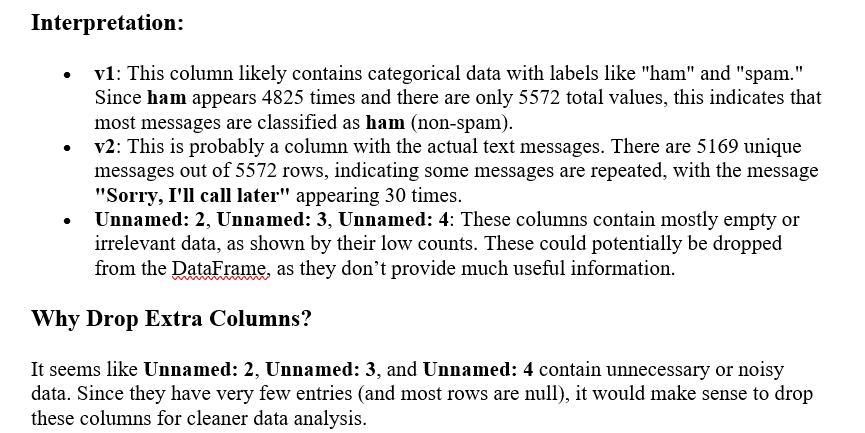

In [265]:
#class Distribution for type
class_distribution = df['v1'].value_counts()

# Display the class distribution
print("class_distribution")
print(type(class_distribution))
print(class_distribution.index)

class_distribution
<class 'pandas.core.series.Series'>
Index(['ham', 'spam'], dtype='object', name='v1')


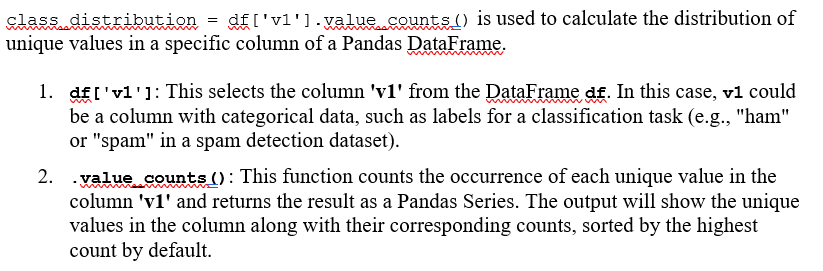
1. This is useful when you're analyzing the class balance of a dataset for classification tasks. In the case of imbalanced data, you may need to apply techniques to address this, such as resampling or weighting.

1. In the bar plot, you're plotting a single data series, so it only generates one entry in the legend. To show both "ham" and "spam," you need to explicitly link each bar with its label when you call ax.bar().
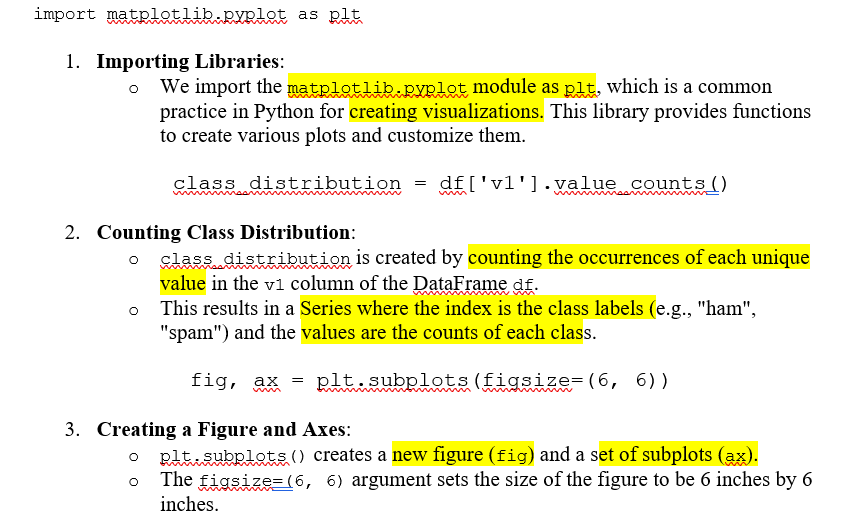
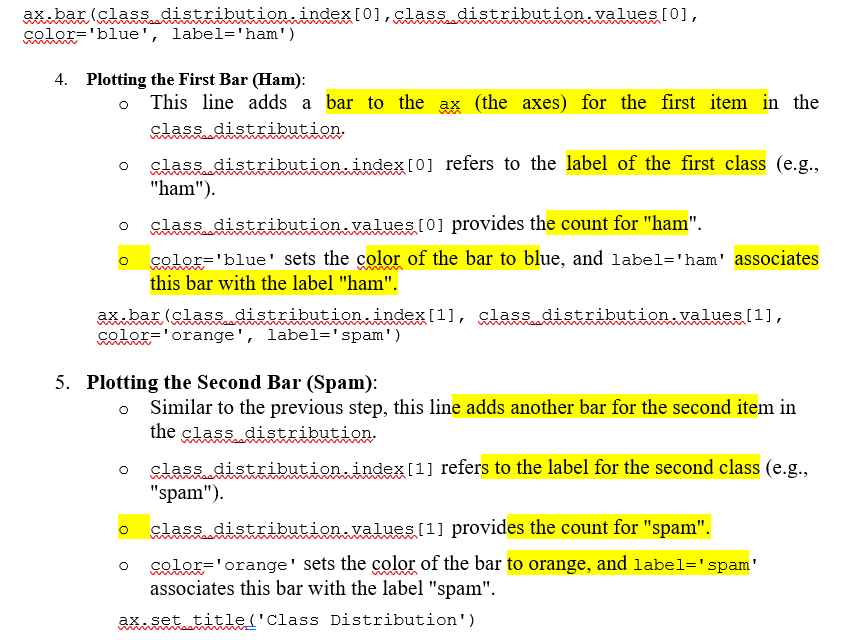
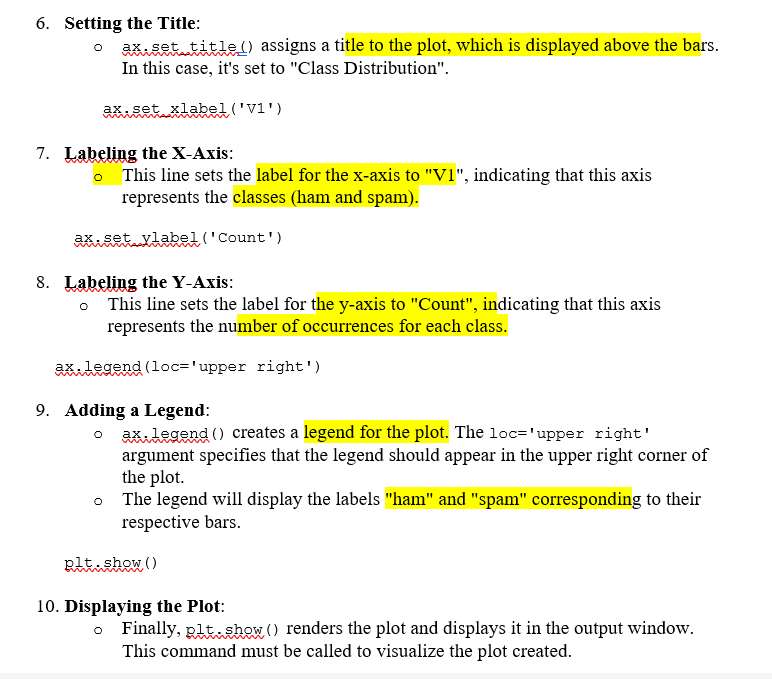

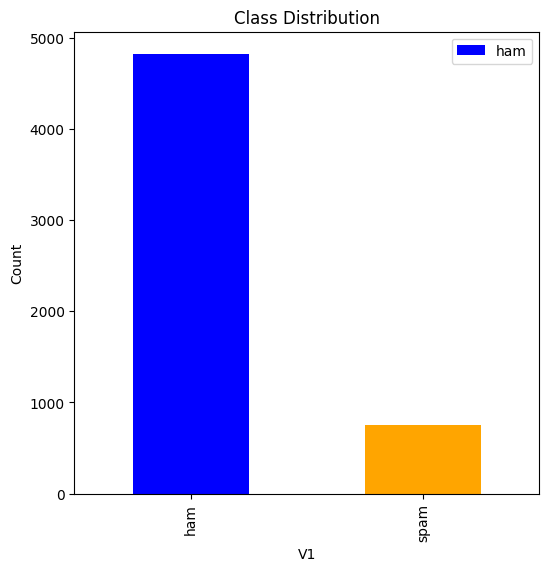

In [264]:
#The legend is the small box (usually on the side or top of the graph) with labels "Ham" and "Spam" 
#showing the color associated with each class.

import seaborn as sns
import matplotlib.pyplot as plt
# Bar Plot for Class Distribution
class_distribution = df['v1'].value_counts()
class_distribution.plot(kind='bar',color=['blue', 'orange'],figsize = (6, 6))
plt.title('Class Distribution')
plt.xlabel('V1')
# Automatically set the legend using class_distribution.index
plt.legend(class_distribution.index)
#plt.legend(['ham', 'spam'])
#plt.legend(class_distribution.index)
plt.ylabel('Count')
plt.show()

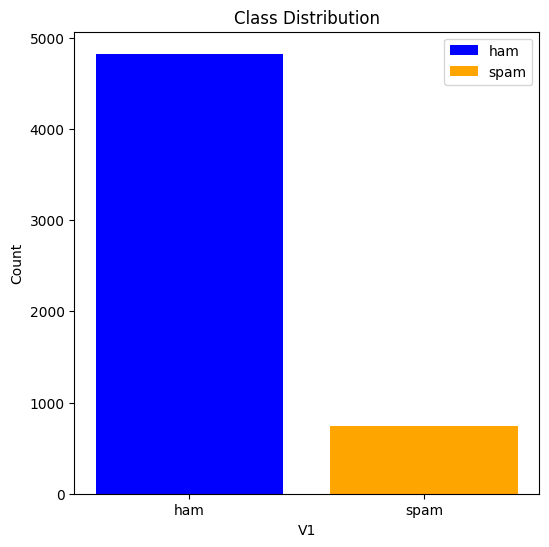

In [267]:
import matplotlib.pyplot as plt

# Bar Plot for Class Distribution
class_distribution = df['v1'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot each bar separately to associate them with labels
ax.bar(class_distribution.index[0], class_distribution.values[0], color='blue', label='ham')
ax.bar(class_distribution.index[1], class_distribution.values[1], color='orange', label='spam')

# Add title and labels
ax.set_title('Class Distribution')
ax.set_xlabel('V1')
ax.set_ylabel('Count')

# Add a legend with the correct labels
ax.legend(loc='upper right')

# Show the plot
plt.show()


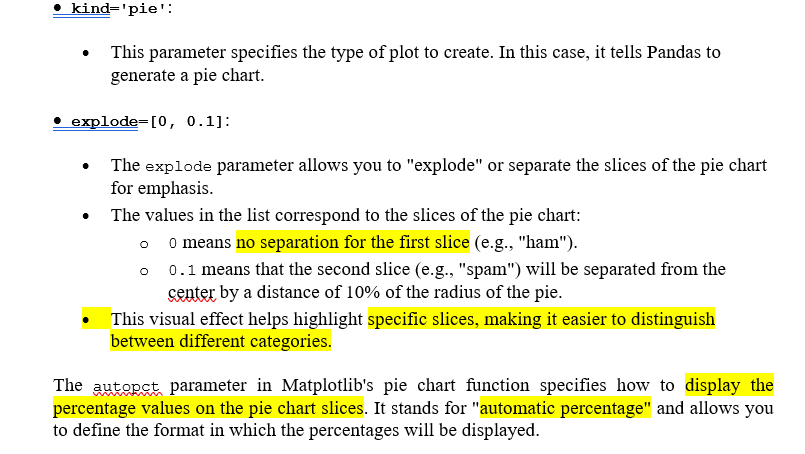
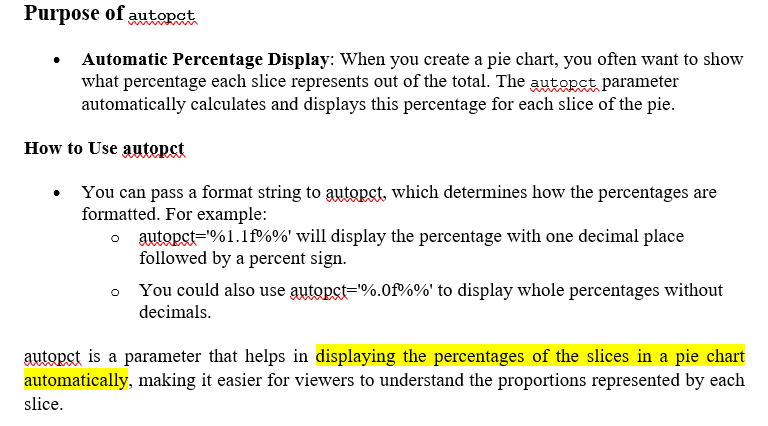

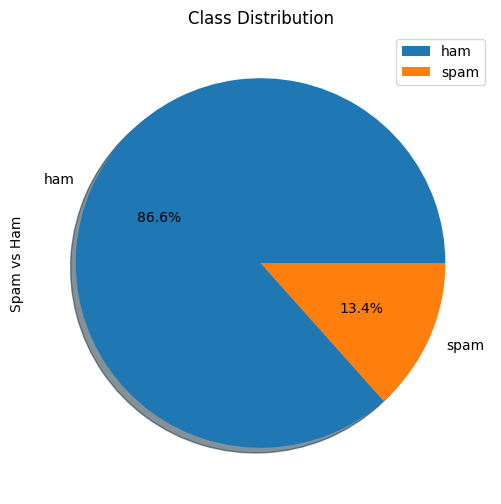

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
# Bar Plot for Class Distribution
df["v1"].value_counts().plot (kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
# try explode = [0, 0]
plt.title('Class Distribution')
plt.ylabel("Spam vs Ham")
# Manually set legend with correct labels
plt.legend(["ham", "spam"]) ## Ensure case matches with your data (lowercase 'ham', 'spam')

plt.show()

In [239]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 220.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 245.8 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/301.4 kB 353.1 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/301.4 kB 778.2 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 983.6 kB/s eta 0:00:00


#Word cloud for text visualization
#generates and displays a Word Cloud from a text corpus in a Pandas DataFrame
from wordcloud import WordCloud

text_corpus = ' '.join(df['v2'])
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text')
plt.show()

In [ ]:
from wordcloud import WordCloud


1. WordCloud is a class from the wordcloud library, which is used to create word cloud visualizations.
2. A word cloud is a graphical representation of text data where the size of each word reflects its frequency or importance in the text.

#Creating a Text Corpus
1. df['v2']: This selects the column 'v2' from the DataFrame df. Assuming this column contains the text data, each row has a text entry.

2. ' '.join(df['v2']): This joins all the text entries in the 'v2' column into one large string, with each individual entry separated by a space. This creates a single, long text corpus from all the rows in the column.

In [ ]:
text_corpus = ' '.join(df['v2'])


# Generating the Word Cloud
1. WordCloud(...): This initializes the WordCloud object with several parameters:
   1. width=800 and height=400: Set the dimensions of the output image (800 pixels wide and 400 pixels high).
   2. random_state=42: Ensures the layout of the word cloud is the same each time the code is run (for reproducibility).
   3. background_color='white': Sets the background color of the word cloud to white.
4. generate(text_corpus): This generates the word cloud from the text_corpus. The size of each word in the word cloud will be proportional to its frequency in the corpus.


In [242]:
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text_corpus)


Displaying the Word Cloud

In [ ]:
plt.figure(figsize=(10, 5)) #This creates a new figure (or canvas) for the plot, with a size of 10 inches by 5 inches.
#This function is used to create a new figure(or the overall space where the plot will be drawn) or plotting area.

1. plt.imshow(wordcloud): This displays the word cloud image. The wordcloud object contains the graphical representation of the word cloud.

2. interpolation='bilinear': This smooths the image when it is displayed, making the word cloud appear less pixelated.

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')


In [ ]:
plt.axis('off') #his removes the axis from the plot, so no axis lines or labels are shown


In [ ]:
plt.title('Word Cloud for Text') #Adds a title to the plot, in this case, "Word Cloud for Text."


In [ ]:
plt.show()# Displays the plot with the word cloud.


1. <b>Word Cloud Generation Flow:</b>
2. The text from column 'v2' is concatenated into one string.
3. The WordCloud object is created using specific dimensions and settings.
4. The word cloud is generated based on the frequency of words in the text corpus.
5. Finally, the word cloud is plotted and displayed using matplotlib.
6. The result will be a visual representation of the most frequent words in the text, with more frequent words appearing
larger in the word cloud.

In [218]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV
from nltk.corpus import wordnet as wn

# Sample data
data = {'text': ['Hello World!', None, '', 'Short', 'This is a long enough sentence.']}
messages = pd.DataFrame(data)

# Define a function to get wordnet POS tag
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN

# Clean text function
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return text

# Step 1: Drop rows with NaN or empty strings
messages = messages.dropna(subset=['text'])  # Remove NaN
messages = messages[messages['text'].str.strip() != '']  # Remove empty strings

# Step 2: Apply the clean_text function
messages["cleaned_text"] = messages["text"].apply(lambda x: clean_text(x))

# Step 3: Filter out short sentences (less than 5 tokens)
messages = messages[messages["cleaned_text"].apply(lambda x: len(x.split()) >= 2)]

# Show the result
messages


,text,cleaned_text
0,Hello World!,hello world
4,This is a long enough sentence.,long enough sentence


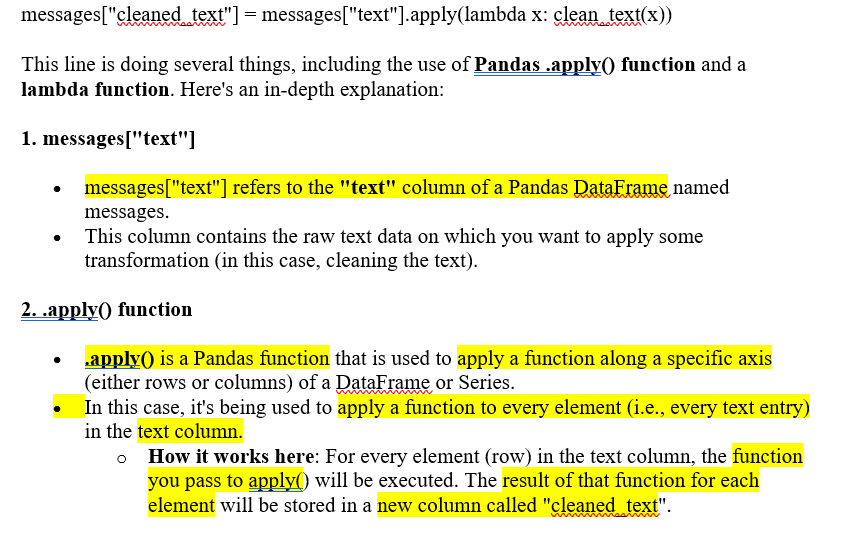
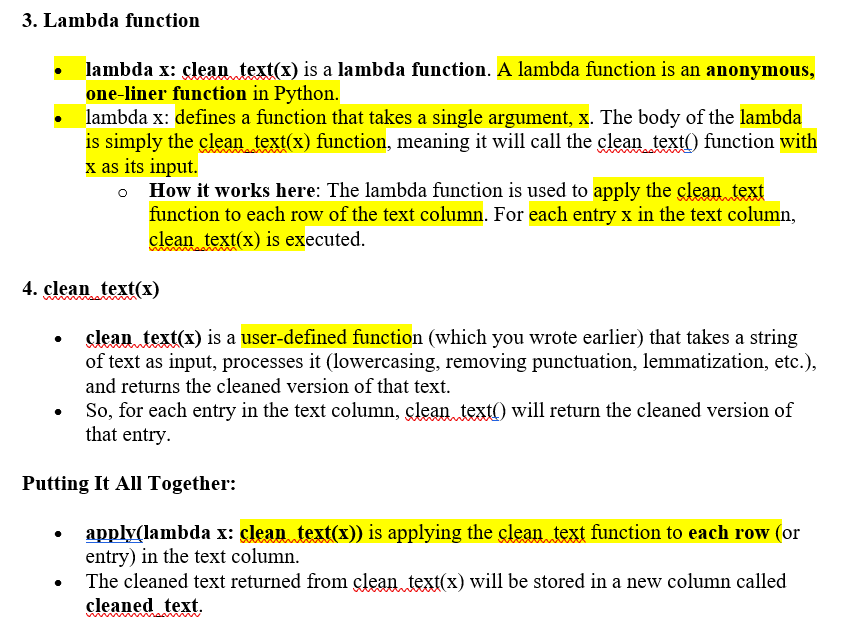
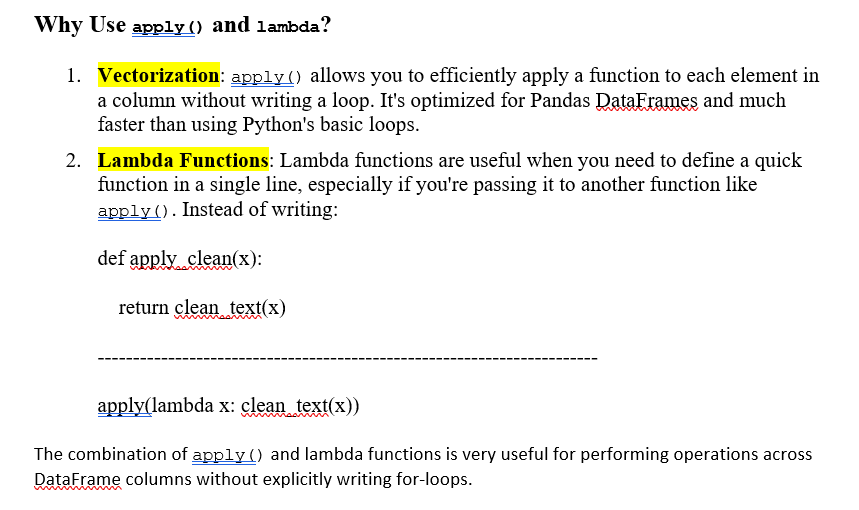


In [231]:
#checking for null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [233]:
#If you have a DataFrame like this:
import pandas as pd

data = {'A': [1, 2, None, 4],
        'B': [None, 1, 2, 3],
        'C': [1, None, None, 4]}
dfn = pd.DataFrame(data)


In [234]:
#Now, if you run df.isnull().sum(), the output will be:
dfn.isnull().sum()
#A: There is 1 missing value in column A.
#B: There is 1 missing value in column B.
#C: There are 2 missing values in column C.

A    1
B    1
C    2
dtype: int64

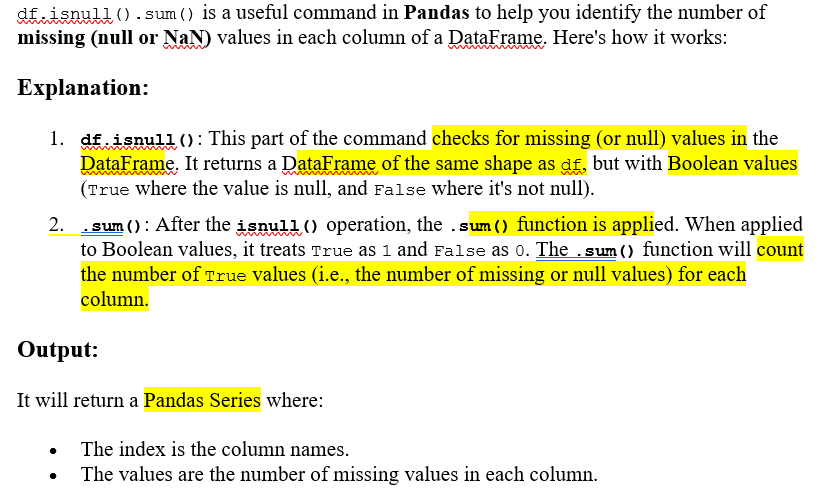

In [219]:
import nltk

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords

from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)



[nltk_data] Downloading package stopwords to C:\Users\Dr. Atif
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dr. Atif Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Dr. Atif
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [220]:
# clean text data
messages["cleaned_text"] = messages["text"].apply(lambda x: clean_text(x))
messages

,text,cleaned_text
0,Hello World!,hello world
4,This is a long enough sentence.,long enough sentence
